# Testing KNN Model

Importing data and necessary library

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
import pandas as pd
import numpy as np

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

drive.mount('/content/drive') #Connecting our colab with our Drive

file_path = "/content/drive/Shareddrives/IS24/Data.csv"

data = []
data = pd.read_csv("/content/drive/Shareddrives/IS24/Data.csv") # Reading Initial Data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


USE PICKLE TO LOAD FILE WITHOUT RE-READING THEM. ALSO help with re-read variables
Load data without reread the data.

Preparing Data For analysis:
1. Change value to booleans
2. Change categorical values to dummy

Running KNN classification

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd

selected_features_rfe = [
    "FACIND_1",
    "FACSEC_1",
    "BACARN_51",
    "BACARN_54",
    "VETSTAT_2",
    "BACARN_56",
    "FACBEN_4",
    "FACSEC_L",
    "FACIND_L",
    "FACADV_L",
    "FACCHAL_L",
    "FACLOC_L",
    "FACRESP_L",
    "FACSAL_L",
    "FACBEN_L",
    "FACSAL_4",
    "MARIND"
]

X = data[selected_features_rfe]
y = data['LFSTAT']


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
results.append((7, accuracy))
cm = confusion_matrix(y_test, y_pred)


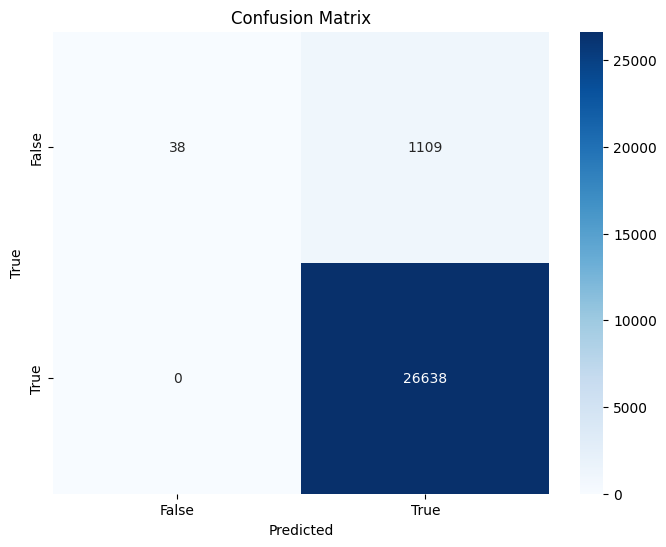

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Accuracy: 0.9600863775418391
Confusion Matrix:
[[   38  1109]
 [    0 26638]]
Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.03      0.06      1147
        True       0.96      1.00      0.98     26638

    accuracy                           0.96     27785
   macro avg       0.98      0.52      0.52     27785
weighted avg       0.96      0.96      0.94     27785



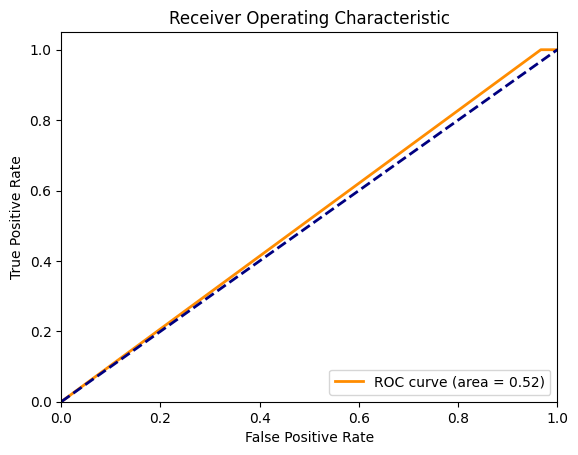

In [ ]:
# Assuming binary classification
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()